SCENARIO:1

In [69]:
#24BAD064
#LOHITH V P 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#24BAD064
#LOHITH V P 
df=pd.read_csv('StudentsPerformance.csv')

In [ ]:
#24BAD064
#LOHITH V P 
df['target']=(df['math score']+df['reading score']+df['writing score'])/3

In [ ]:
#24BAD064
#LOHITH V P 
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,target
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [ ]:
#24BAD064
#LOHITH V P 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   1000 non-null   int64  
 6   reading score                1000 non-null   int64  
 7   writing score                1000 non-null   int64  
 8   target                       1000 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB


In [ ]:
#24BAD064
#LOHITH V P 
df.describe()

,math score,reading score,writing score,target
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,67.770667
std,15.16308,14.600192,15.195657,14.257326
min,0.00000,17.000000,10.000000,9.000000
25%,57.00000,59.000000,57.750000,58.333333
50%,66.00000,70.000000,69.000000,68.333333
75%,77.00000,79.000000,79.000000,77.666667
max,100.00000,100.000000,100.000000,100.000000


In [ ]:
#24BAD064
#LOHITH V P 
df['test preparation course'].value_counts()

test preparation course
none         642
completed    358
Name: count, dtype: int64

In [ ]:
#24BAD064
#LOHITH V P 
df['test preparation course']=df['test preparation course'].map({'none':0,'completed':1})

In [ ]:
#24BAD064
#LOHITH V P 
df['lunch'].value_counts()

lunch
standard        645
free/reduced    355
Name: count, dtype: int64

In [ ]:
#24BAD064
#LOHITH V P 
df['lunch']=df['lunch'].map({'standard':1,'free/reduced':0})

In [ ]:
#24BAD064
#LOHITH V P 
df['race/ethnicity'].value_counts()

race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

In [ ]:
#24BAD064
#LOHITH V P 
df['parental level of education'].value_counts()

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

In [ ]:
#24BAD064
#LOHITH V P 
df['parental level of education']=df['parental level of education'].map({'some high school':0,'high school':1,'some college':2,"associate's degree":3,"bachelor's degree":4,"master's degree":5})

In [ ]:
#24BAD064
#LOHITH V P 
df['gender'].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

In [ ]:
#24BAD064
#LOHITH V P 
df['gender']=df['gender'].map({'male':0,'female':1})

<Axes: xlabel='race/ethnicity', ylabel='target'>

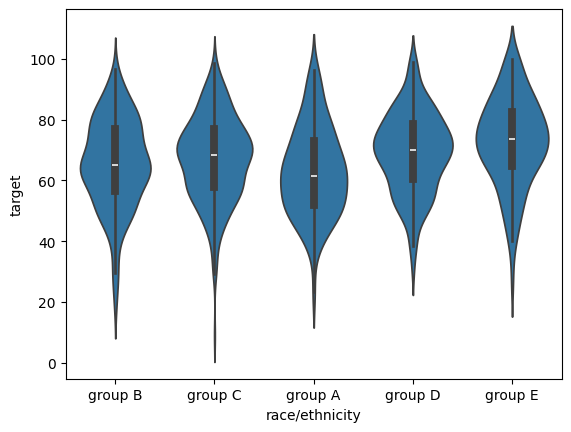

In [84]:
sns.violinplot(x='race/ethnicity',y='target',data=df)

In [85]:
df=pd.get_dummies(df,columns=['race/ethnicity'], drop_first=True)

<Axes: >

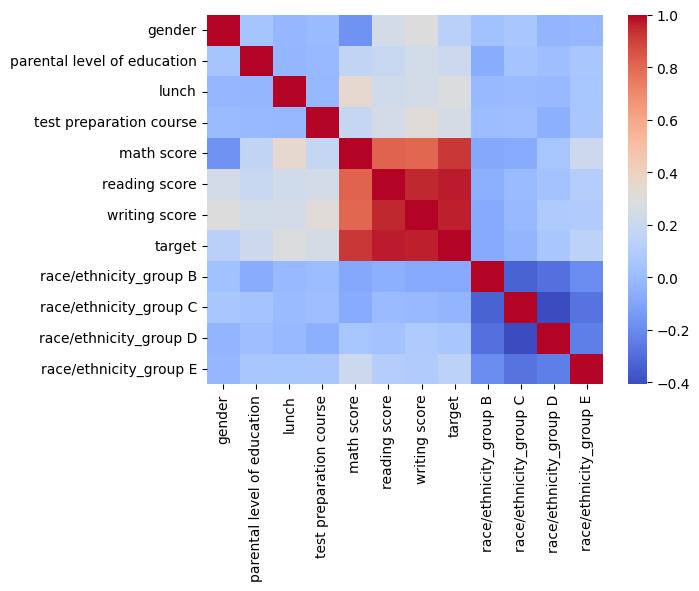

In [86]:
sns.heatmap(df.corr(),cmap='coolwarm')

In [87]:
y=df['target']
x = df.drop(['target', 'reading score', 'writing score'],axis=1)

In [ ]:
#24BAD064
#LOHITH V P 
from sklearn.model_selection import train_test_split

In [ ]:
#24BAD064
#LOHITH V P 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
#24BAD064
#LOHITH V P 
from sklearn.preprocessing import StandardScaler

In [91]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
#24BAD064
#LOHITH V P 
from sklearn.linear_model import Ridge

In [93]:
model=Ridge(alpha=1.0)
model.fit(x_train,y_train)

Ridge()

In [94]:
y_pred=model.predict(x_test)

Text(0.5, 1.0, 'Actual vs Predicted Values')

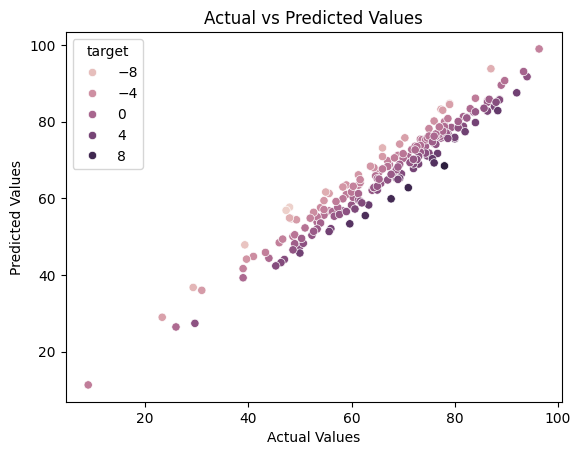

In [ ]:
#24BAD064
#LOHITH V P 
sns.scatterplot(x=y_test,y=y_pred,hue=y_test-y_pred)
plt.xlabel('Actual Values') 
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

In [96]:
from sklearn.metrics import mean_squared_error, r2_score

In [97]:
mean_squared_error(y_test,y_pred)

11.345111027757737

In [98]:
r2_score(y_test,y_pred)

0.9470761173061141

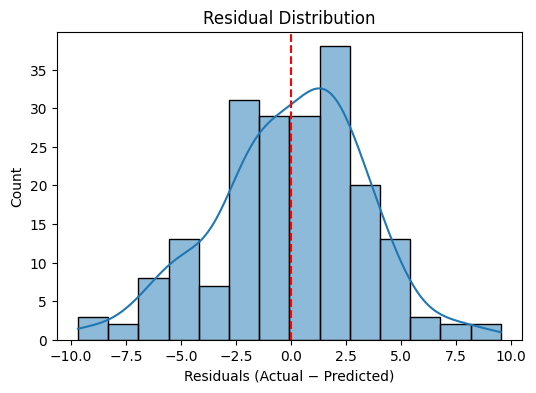

In [100]:
residuals = y_test - y_pred

plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True)

plt.axvline(0, color='red', linestyle='--')
plt.xlabel("Residuals (Actual − Predicted)")
plt.title("Residual Distribution")
plt.show()

In [101]:
model.coef_

array([ 4.10342478,  0.52785854, -0.60839228,  1.22263041, 13.64716758,
       -0.13776076,  0.14027876,  0.19542117, -0.82480504])

SCENARIO : 2

In [130]:
# Lohith V P 24BAD064
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score


In [131]:
# Lohith V P 24BAD064
df_car = pd.read_csv('auto-mpg.csv')
df_car.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


In [133]:
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

In [134]:
df_car.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [135]:
df_car['car name'].value_counts().sum()

398

In [136]:
df_car.drop('car name', axis=1, inplace=True)

In [137]:
df_car['origin'].value_counts()

origin
1    249
3     79
2     70
Name: count, dtype: int64

In [138]:
X = df[['horsepower']]
y = df['mpg']


In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [140]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [152]:
train_errors = []
test_errors = []

In [ ]:
# Polynomial Regression - Degree 2
poly2 = PolynomialFeatures(degree=2)

X_train_poly2 = poly2.fit_transform(X_train_scaled)
X_test_poly2 = poly2.transform(X_test_scaled)

model2 = LinearRegression()
model2.fit(X_train_poly2, y_train)

y_pred2 = model2.predict(X_test_poly2)

mse2 = mean_squared_error(y_test, y_pred2)
rmse2 = np.sqrt(mse2)
r2_2 = r2_score(y_test, y_pred2)

print("Degree 2")
print("MSE:", mse2)
print("RMSE:", rmse2)
print("R2 Score:", r2_2)


Degree 2
MSE: 18.416967796017797
RMSE: 4.291499481069268
R2 Score: 0.6391701147013311


In [ ]:
# Polynomial Regression - Degree 3
poly3 = PolynomialFeatures(degree=3)

X_train_poly3 = poly3.fit_transform(X_train_scaled)
X_test_poly3 = poly3.transform(X_test_scaled)

model3 = LinearRegression()
model3.fit(X_train_poly3, y_train)

y_pred3 = model3.predict(X_test_poly3)

mse3 = mean_squared_error(y_test, y_pred3)
rmse3 = np.sqrt(mse3)
r2_3 = r2_score(y_test, y_pred3)

print("Degree 3")
print("MSE:", mse3)
print("RMSE:", rmse3)
print("R2 Score:", r2_3)


Degree 3
MSE: 18.46026722222464
RMSE: 4.2965413092654705
R2 Score: 0.6383217814053859


In [ ]:
# Polynomial Regression - Degree 4
poly4 = PolynomialFeatures(degree=4)

X_train_poly4 = poly4.fit_transform(X_train_scaled)
X_test_poly4 = poly4.transform(X_test_scaled)

model4 = LinearRegression()
model4.fit(X_train_poly4, y_train)

y_pred4 = model4.predict(X_test_poly4)

mse4 = mean_squared_error(y_test, y_pred4)
rmse4 = np.sqrt(mse4)
r2_4 = r2_score(y_test, y_pred4)

print("Degree 4")
print("MSE:", mse4)
print("RMSE:", rmse4)
print("R2 Score:", r2_4)


Degree 4
MSE: 18.26822687485318
RMSE: 4.274134634619408
R2 Score: 0.6420842844016577


In [ ]:
# Ridge Regression with Polynomial Degree 4
ridge = Ridge(alpha=1.0)

ridge.fit(X_train_poly4, y_train)

y_pred_ridge = ridge.predict(X_test_poly4)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression (Degree 4)")
print("MSE:", mse_ridge)
print("RMSE:", rmse_ridge)
print("R2 Score:", r2_ridge)


Ridge Regression (Degree 4)
MSE: 18.306987250854775
RMSE: 4.278666527185167
R2 Score: 0.6413248813239256


In [ ]:
# Ridge Regression with Polynomial Degree 4
ridge = Ridge(alpha=1.0)

ridge.fit(X_train_poly4, y_train)

y_pred_ridge = ridge.predict(X_test_poly4)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression (Degree 4)")
print("MSE:", mse_ridge)
print("RMSE:", rmse_ridge)
print("R2 Score:", r2_ridge)


Ridge Regression (Degree 4)
MSE: 18.306987250854775
RMSE: 4.278666527185167
R2 Score: 0.6413248813239256


c:\Users\Hp\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


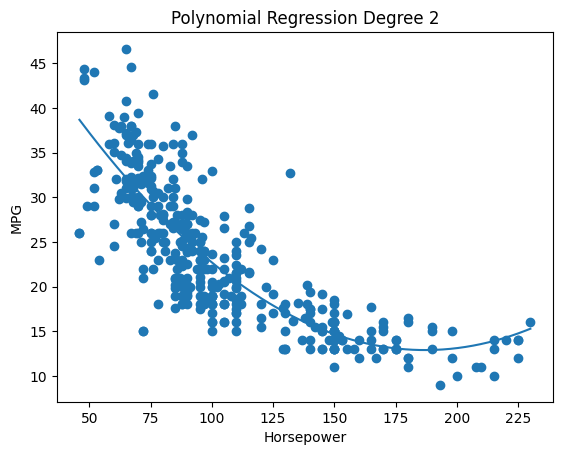

In [159]:
hp_range = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
hp_scaled = scaler.transform(hp_range)

hp_poly2 = poly2.transform(hp_scaled)
mpg_poly2 = model2.predict(hp_poly2)

plt.figure()
plt.scatter(X, y)
plt.plot(hp_range, mpg_poly2)
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.title("Polynomial Regression Degree 2")
plt.show()



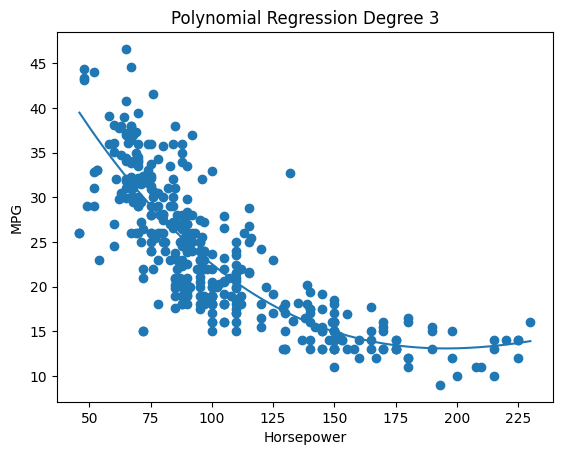

In [148]:
hp_poly3 = poly3.transform(hp_scaled)
mpg_poly3 = model3.predict(hp_poly3)

plt.figure()
plt.scatter(X, y)
plt.plot(hp_range, mpg_poly3)
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.title("Polynomial Regression Degree 3")
plt.show()


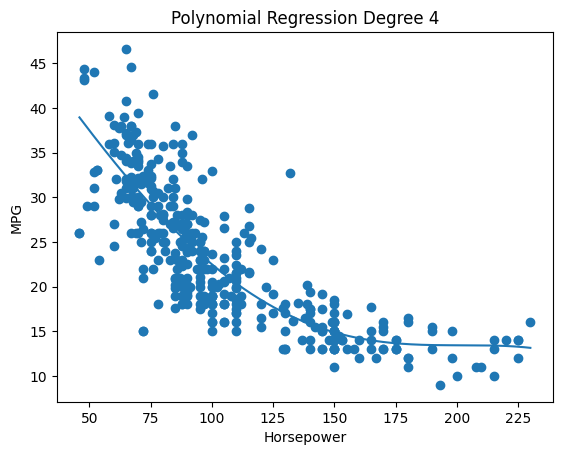

In [149]:
hp_poly4 = poly4.transform(hp_scaled)
mpg_poly4 = model4.predict(hp_poly4)

plt.figure()
plt.scatter(X, y)
plt.plot(hp_range, mpg_poly4)
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.title("Polynomial Regression Degree 4")
plt.show()


c:\Users\Hp\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


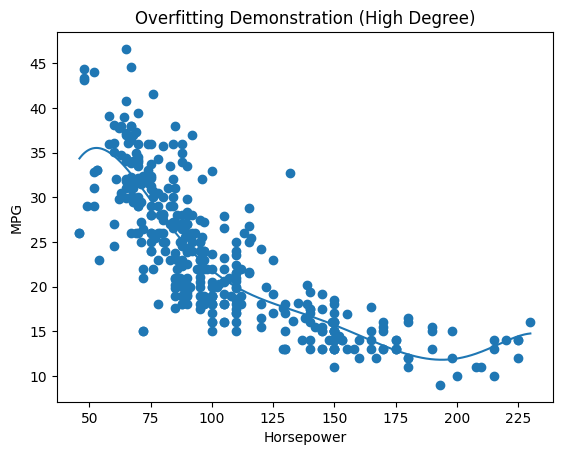

In [162]:
hp_range = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
hp_scaled = scaler.transform(hp_range)

poly_over = PolynomialFeatures(degree=6)
X_train_over = poly_over.fit_transform(X_train_scaled)
hp_over = poly_over.transform(hp_scaled)

model_over = LinearRegression()
model_over.fit(X_train_over, y_train)

mpg_over = model_over.predict(hp_over)

plt.figure()
plt.scatter(X, y)
plt.plot(hp_range, mpg_over)
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.title("Overfitting Demonstration (High Degree)")
plt.show()
